<a href="https://colab.research.google.com/github/GenoKiller777/PythonMyFirstNeuronalNetwork/blob/main/ANN_Iris_DarwinPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Iris Dataset con ANN

En este notebook entrenaremos un red neuronal para establecer un modelo de clasificación de las especies de Iris.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importamos el dataset de ejemplo

In [2]:
from sklearn.datasets import load_iris

In [3]:
bunch = load_iris()

In [4]:
df = pd.DataFrame(bunch.data, columns=bunch.feature_names)

In [39]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### Formulamos el Modelo


In [6]:
X = df
y = bunch.target

#### Preprocesamiento de los datos

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_dum = pd.get_dummies(y_enc).values

#### Validación cruzada

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dum, test_size=0.2, random_state=101)

#### Importación librerías ANN

In [11]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

#### Diseño arquitectura ANN

Cree una red con la siguiente arquitectura:
- Input vector (4 nodos) activacion 'tanh'
- Hidden Layer 1 (10 nodos) activacion 'tanh'
- Hidden Layer 2 (8 nodos) activacion 'tanh'
- Hidden Layer 3 (6 nodos) activacion 'softmax'

Utilice optimizador Adam con learning rate de 0.02

In [12]:
model = Sequential()
model.add(Input(shape = (4,)))
model.add(Dense(10, activation ='tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax'))

#### Entrenamiento ANN

In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 0.02)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.utils import plot_model

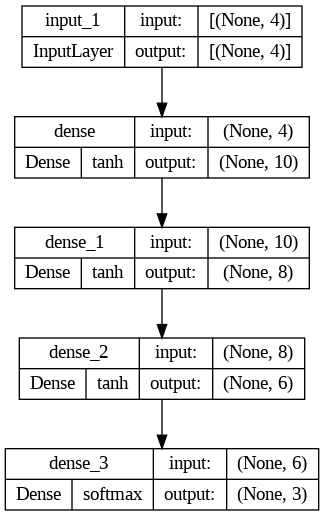

In [17]:
plot_model(model, show_shapes = True, show_layer_activations = True)

#### Predicciones con el modelo ANN

In [18]:
history = model.fit(X_train, y_train, batch_size= 128, epochs=50,
                    validation_data = (X_test,y_test))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.0725 - accuracy: 0.3500 - val_loss: 0.9865 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 0s 60ms/step - loss: 0.9600 - accuracy: 0.6833 - val_loss: 0.8967 - val_accuracy: 0.9667
Epoch 3/50
1/1 [==============================] - 0s 61ms/step - loss: 0.8783 - accuracy: 0.9500 - val_loss: 0.8325 - val_accuracy: 0.8667
Epoch 4/50
1/1 [==============================] - 0s 46ms/step - loss: 0.8075 - accuracy: 0.8417 - val_loss: 0.7814 - val_accuracy: 0.8333
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 0.7511 - accuracy: 0.8083 - val_loss: 0.7213 - val_accuracy: 0.8333
Epoch 6/50
1/1 [==============================] - 0s 52ms/step - loss: 0.6915 - accuracy: 0.7917 - val_loss: 0.6607 - val_accuracy: 0.9000
Epoch 7/50
1/1 [==============================] - 0s 42ms/step - loss: 0.6349 - accuracy: 0.8417 - val_loss: 0.6019 - val_accuracy: 0.9667
Epoch 8/50
1/1 [=============

#### Métricas de Evaluación

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 168ms/step


In [21]:
y_pred[:5]

array([[9.8493093e-01, 1.4863951e-02, 2.0497751e-04],
       [9.8465127e-01, 1.5142051e-02, 2.0660492e-04],
       [9.8311687e-01, 1.6665213e-02, 2.1789319e-04],
       [2.1672749e-03, 2.6583770e-01, 7.3199511e-01],
       [9.0564387e-03, 9.8855668e-01, 2.3868913e-03]], dtype=float32)

In [22]:
y_test[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [23]:
y_pred_clase = np.argmax(y_pred, axis=1)

In [24]:
y_test_clase = np.argmax(y_test, axis=1)

##### Accuracy del modelo

In [25]:
accuracy_score(y_pred_clase,y_test_clase)

1.0

##### Matriz de Confusión

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_test_clase, y_pred_clase)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  8]])

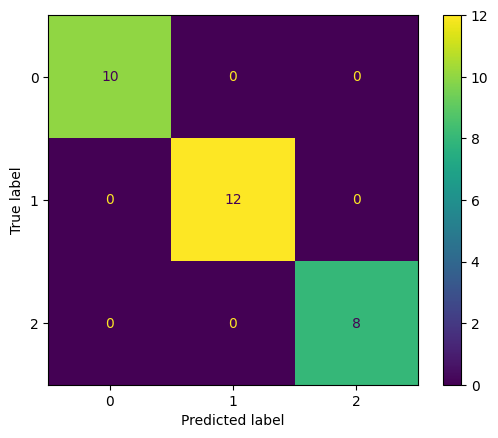

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix( y_test_clase, y_pred_clase)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

### Graficar métricas vs epochs (train y test)

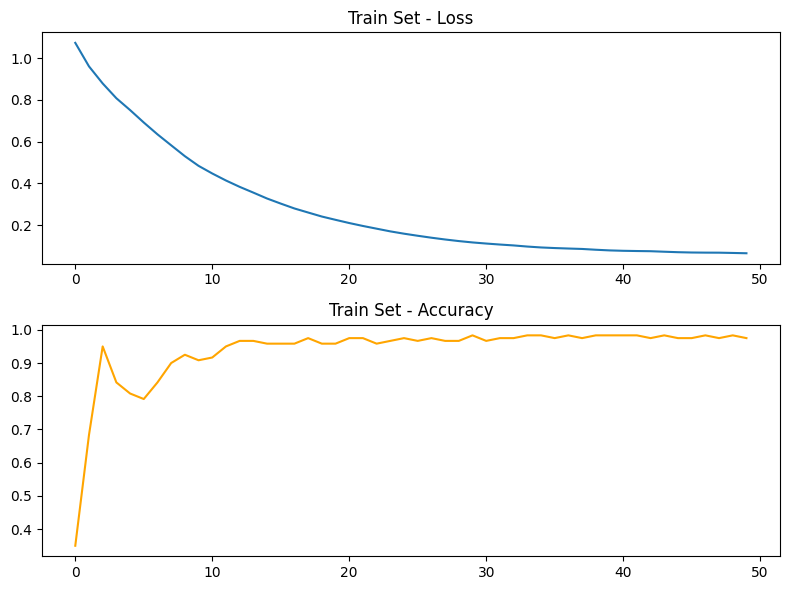

In [40]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Train Set - Loss')
plt.plot(history.history['loss'])
plt.subplot(2,1,2)
plt.title('Train Set - Accuracy')
plt.plot(history.history['accuracy'],color ='orange')

plt.tight_layout()
plt.show()

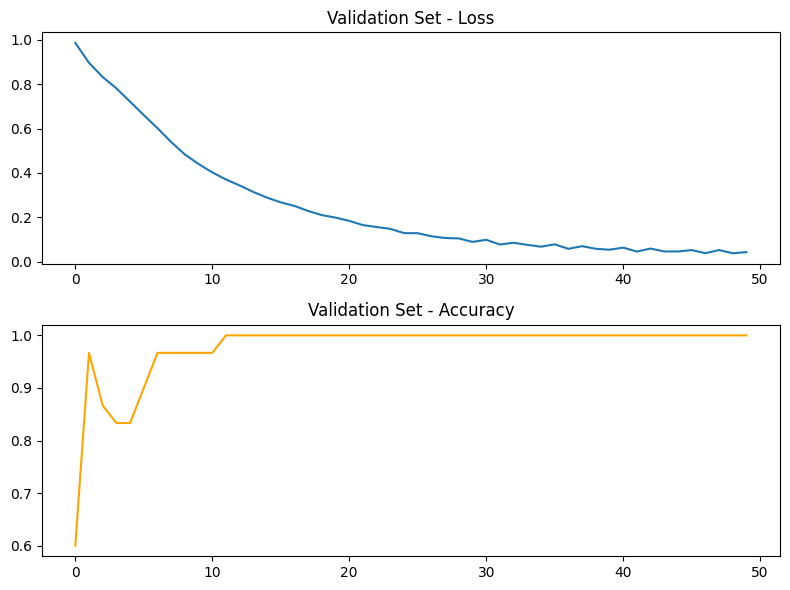

In [41]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('Validation Set - Loss')
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.title('Validation Set - Accuracy')
plt.plot(history.history['val_accuracy'],color ='orange')

plt.tight_layout()
plt.show()